In [6]:
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt
import matplotlib
%matplotlib inline 

In [7]:
data=pd.read_csv("athlete_events.csv")
data.head()

,ID,Name,Sex,Age,Height,Weight,Team,NOC,Games,Year,Season,City,Sport,Event,Medal
0,1,A Dijiang,M,24.0,180.0,80.0,China,CHN,1992 Summer,1992,Summer,Barcelona,Basketball,Basketball Men's Basketball,NaN
1,2,A Lamusi,M,23.0,170.0,60.0,China,CHN,2012 Summer,2012,Summer,London,Judo,Judo Men's Extra-Lightweight,NaN
2,3,Gunnar Nielsen Aaby,M,24.0,NaN,NaN,Denmark,DEN,1920 Summer,1920,Summer,Antwerpen,Football,Football Men's Football,NaN
3,4,Edgar Lindenau Aabye,M,34.0,NaN,NaN,Denmark/Sweden,DEN,1900 Summer,1900,Summer,Paris,Tug-Of-War,Tug-Of-War Men's Tug-Of-War,Gold
4,5,Christine Jacoba Aaftink,F,21.0,185.0,82.0,Netherlands,NED,1988 Winter,1988,Winter,Calgary,Speed Skating,Speed Skating Women's 500 metres,NaN


In [8]:
data.describe()

,ID,Age,Height,Weight,Year
count,271116.000000,261642.000000,210945.000000,208241.000000,271116.000000
mean,68248.954396,25.556898,175.338970,70.702393,1978.378480
std,39022.286345,6.393561,10.518462,14.348020,29.877632
min,1.000000,10.000000,127.000000,25.000000,1896.000000
25%,34643.000000,21.000000,168.000000,60.000000,1960.000000
50%,68205.000000,24.000000,175.000000,70.000000,1988.000000
75%,102097.250000,28.000000,183.000000,79.000000,2002.000000
max,135571.000000,97.000000,226.000000,214.000000,2016.000000


In [9]:
data_age_by_years=data.groupby("Year")["Age"].mean().sort_index()
list_years= data_age_by_years.index.tolist()

data_years=data.sort_values("Year")["Year"].drop_duplicates()
list_years_2=data_years.values.tolist()
len(list_years_2)

def listes_egaux(list_years,list_years_2):
    for i in range(len(list_years_2)):
        if list_years[i] not in list_years_2:
            print(" listes non egaux")
            return 0
    print("listes egaux") 
listes_egaux(list_years,list_years_2)    

listes egaux


In [10]:
data2=data.pivot_table(values="Age",index=["Year","Games"],aggfunc=[np.mean]).head()
data2

C:\Users\LEGION\AppData\Local\Temp\ipykernel_6936\3153880899.py:1: FutureWarning: The provided callable <function mean at 0x00000262BF11D8A0> is currently using DataFrameGroupBy.mean. In a future version of pandas, the provided callable will be used directly. To keep current behavior pass the string "mean" instead.
  data2=data.pivot_table(values="Age",index=["Year","Games"],aggfunc=[np.mean]).head()


,,mean
,,Age
Year,Games,
1896,1896 Summer,23.580645
1900,1900 Summer,29.034031
1904,1904 Summer,26.698150
1906,1906 Summer,27.125253
1908,1908 Summer,26.970228


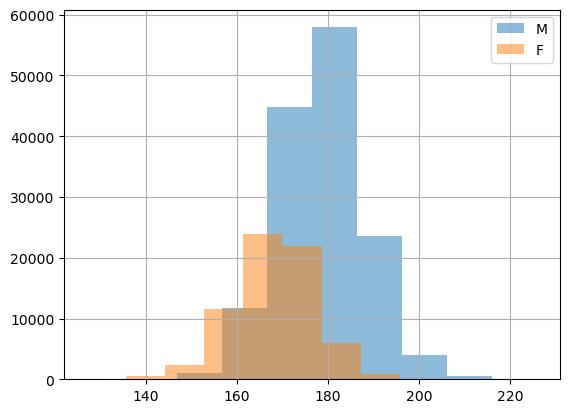

In [11]:
data[data["Sex"]=="M"]["Height"].hist(alpha=0.5)
data[data["Sex"]=="F"]["Height"].hist(alpha=0.5)
plt.legend(["M","F"])
plt.show()

In [12]:
data_Weight_by_sex=data.groupby("Sex")["Height"].agg([np.mean,np.max,np.min])
data_Weight_by_sex

C:\Users\LEGION\AppData\Local\Temp\ipykernel_6936\2397952550.py:1: FutureWarning: The provided callable <function mean at 0x00000262BF11D8A0> is currently using SeriesGroupBy.mean. In a future version of pandas, the provided callable will be used directly. To keep current behavior pass the string "mean" instead.
  data_Weight_by_sex=data.groupby("Sex")["Height"].agg([np.mean,np.max,np.min])
C:\Users\LEGION\AppData\Local\Temp\ipykernel_6936\2397952550.py:1: FutureWarning: The provided callable <function max at 0x00000262BF11CEA0> is currently using SeriesGroupBy.max. In a future version of pandas, the provided callable will be used directly. To keep current behavior pass the string "max" instead.
  data_Weight_by_sex=data.groupby("Sex")["Height"].agg([np.mean,np.max,np.min])
C:\Users\LEGION\AppData\Local\Temp\ipykernel_6936\2397952550.py:1: FutureWarning: The provided callable <function min at 0x00000262BF11CFE0> is currently using SeriesGroupBy.min. In a future version of pandas, the p

,mean,max,min
Sex,,,
F,167.839740,213.0,127.0
M,178.858463,226.0,127.0


<Axes: xlabel='Sex'>

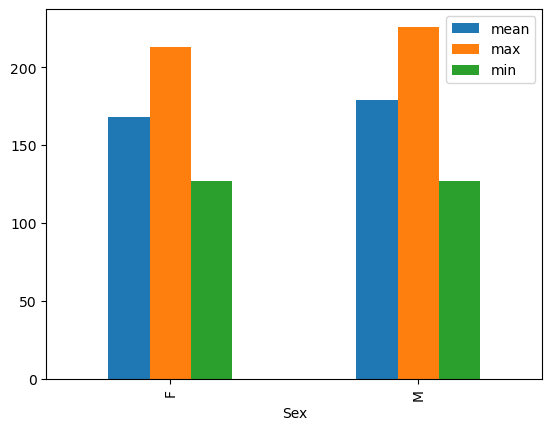

In [13]:
data_Weight_by_sex.plot(kind="bar")

In [14]:
data["Sex"].value_counts()

Sex
M    196594
F     74522
Name: count, dtype: int64

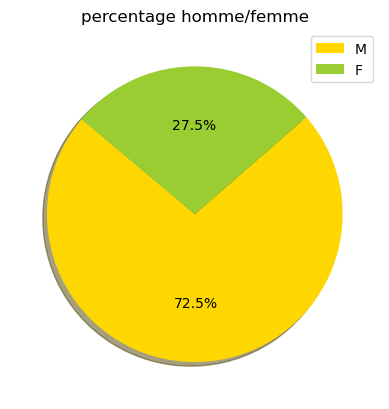

In [15]:
plt.pie(data["Sex"].value_counts(),autopct='%1.1f%%', shadow=True, startangle=140,colors=['gold', 'yellowgreen'])
plt.legend(["M","F"])
plt.title("percentage homme/femme")
plt.show()

Sport
Athletics        38624
Gymnastics       26707
Swimming         23195
Shooting         11448
Cycling          10859
                 ...  
Racquets            12
Jeu De Paume        11
Roque                4
Basque Pelota        2
Aeronautics          1
Name: count, Length: 66, dtype: int64


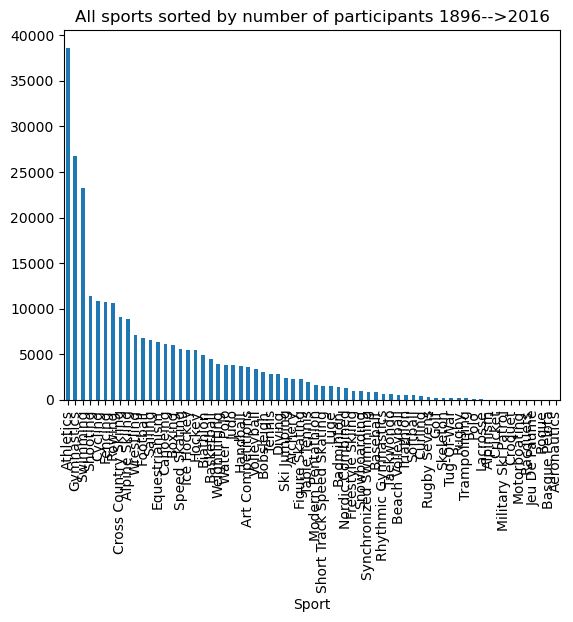

In [16]:
print(data["Sport"].value_counts())
data["Sport"].value_counts().plot(kind="bar",title="All sports sorted by number of participants 1896-->2016")
matplotlib.rcParams["figure.figsize"]=(12,6)

<Axes: title={'center': 'highiest 5 countries participants 1896-->2016 '}, xlabel='Team'>

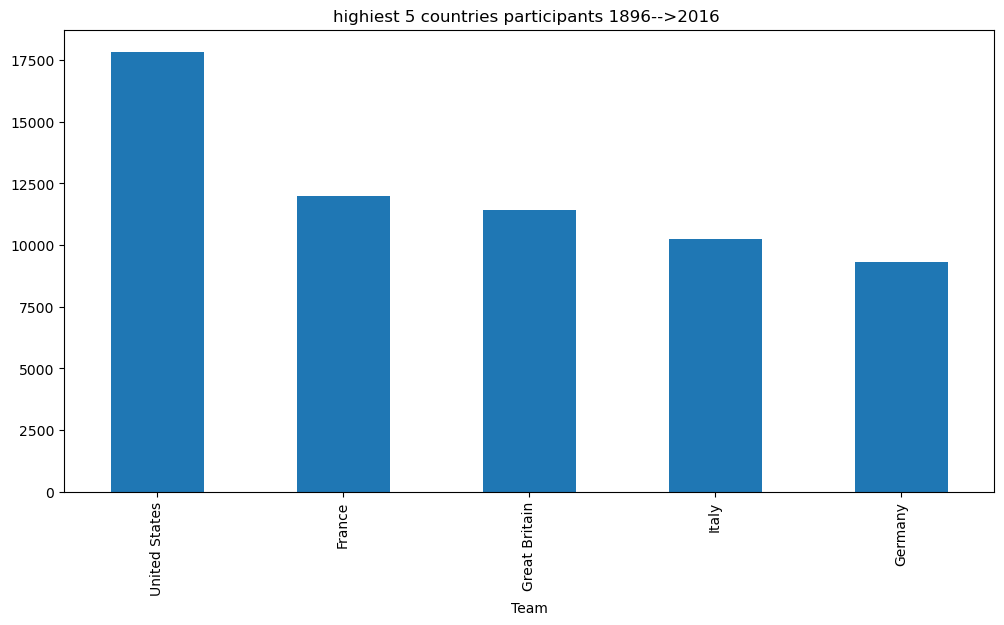

In [17]:
#plt.pie(data["Team"].value_counts().sort_values(ascending=False)[:4],autopct='%1.1f%%')
data["Team"].value_counts().sort_values(ascending=False)[:5].plot(kind="bar",title="highiest 5 countries participants 1896-->2016 ")


In [18]:
tun_data=data[(data["Team"]=="Tunisia")]
tun_champ_data=tun_data[tun_data["Medal"].isin(["Gold","Bronze","Silver"])].drop_duplicates(subset="Name")
Tunisian_champ=list(tun_champ_data["Name"])
Tunisian_champ

['Marwa Al-Amri',
 'Ins Boubakri',
 'Habib Galhia',
 'Mohamad Tlili ben Abdallah Gammoudi',
 'Habiba Al-Ghribi-Boudra',
 'Oussama Mellouli',
 'Fathi Al-Missaoui',
 'Oussama Al-Oueslati']

In [19]:
""""from multiprocessing import Pool

def take_mean_age(year_and_group):
    
    
    year,group= year_and_group
    
    return pd.DataFrame({"Age":group["Age"]},index=year)
with Pool(4) as p:
    results=p.map(take_mean_age,data.groupby("Year")) """


'"from multiprocessing import Pool\n\ndef take_mean_age(year_and_group):\n    \n    \n    year,group= year_and_group\n    \n    return pd.DataFrame({"Age":group["Age"]},index=year)\nwith Pool(4) as p:\n    results=p.map(take_mean_age,data.groupby("Year")) '

In [20]:
#mean of age each year  (multi processing using dask)
import time
import dask.dataframe as dd 
start=time.time()
data_dask=dd.from_pandas(data,npartitions=4)

df_result=data_dask.groupby("Year")["Age"].agg(np.mean).compute()
end=time.time()
print("time",end-start)
print(df_result)

time 1.152315378189087
Year
1992    24.318895
2012    25.961378
1920    29.290978
1900    29.034031
1988    24.079432
1994    24.422103
1932    32.582080
2002    25.916281
1952    26.161546
1980    23.694743
2000    25.422504
1996    24.915045
1912    27.538620
1924    28.373325
2014    25.987324
1948    28.783947
1998    25.163197
2006    25.959151
2008    25.734118
2016    26.207919
2004    25.639515
1960    25.168848
1964    24.944397
1984    23.898347
1968    24.248046
1972    24.308607
1936    27.530328
1956    25.926674
1928    29.112557
1976    23.841818
2010    26.124262
1906    27.125253
1904    26.698150
1908    26.970228
1896    23.580645
Name: Age, dtype: float64


In [21]:
#mean of age each year 
start_2=time.time()
df_result_2=data.groupby("Year")["Age"].mean()
end_2=time.time()
print("time",end_2-start_2)
print(df_result_2)

time 0.008253097534179688
Year
1896    23.580645
1900    29.034031
1904    26.698150
1906    27.125253
1908    26.970228
1912    27.538620
1920    29.290978
1924    28.373325
1928    29.112557
1932    32.582080
1936    27.530328
1948    28.783947
1952    26.161546
1956    25.926674
1960    25.168848
1964    24.944397
1968    24.248046
1972    24.308607
1976    23.841818
1980    23.694743
1984    23.898347
1988    24.079432
1992    24.318895
1994    24.422103
1996    24.915045
1998    25.163197
2000    25.422504
2002    25.916281
2004    25.639515
2006    25.959151
2008    25.734118
2010    26.124262
2012    25.961378
2014    25.987324
2016    26.207919
Name: Age, dtype: float64


In [22]:
from scipy import stats
# Test de normalité Shapiro-Wilk
stat, p = stats.shapiro(data["Height"])
print("Statistique de test:", stat)
print("p-valeur:", p)

# Interprétation de la p-valeur
alpha = 0.05

if p > alpha:
    print("Échantillon semble être tiré d'une distribution normale (ne rejette pas l'hypothèse nulle)")
else:
    print("Échantillon ne semble pas être tiré d'une distribution normale (rejette l'hypothèse nulle)")


Statistique de test: nan
p-valeur: 1.0
Échantillon semble être tiré d'une distribution normale (ne rejette pas l'hypothèse nulle)


c:\Users\LEGION\anaconda3\Lib\site-packages\scipy\stats\_morestats.py:1882: UserWarning: p-value may not be accurate for N > 5000.
  warnings.warn("p-value may not be accurate for N > 5000.")


<Axes: xlabel='Sex', ylabel='Height'>

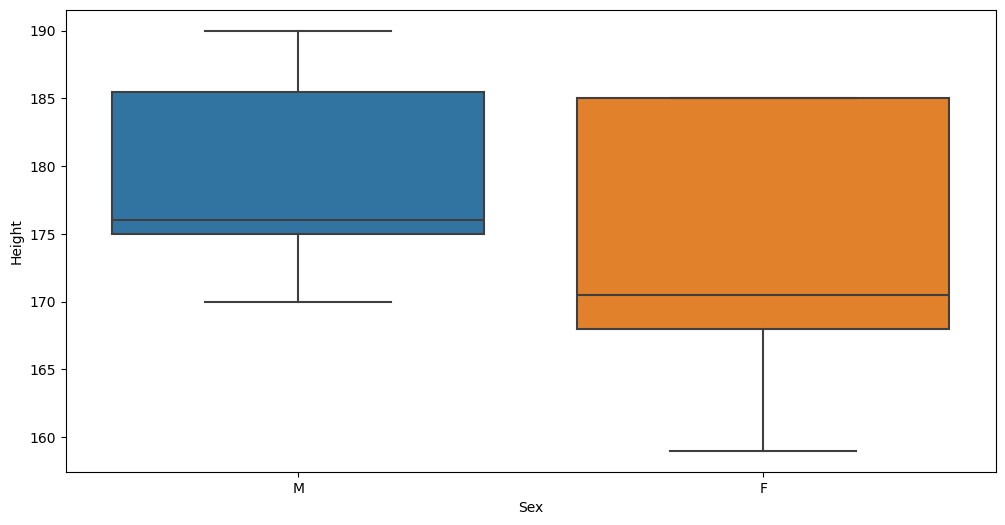

In [23]:
import seaborn as sns 

sns.boxplot(data=data[:100],y="Height",x="Sex")

In [ ]:
data2=data[data["Sex"]== "Football"]

cathegories=["1st","2nd","3rd","not ranked"]

conditions=[data2["Medal"].str.contains("^G"),data2["Medal"].str.contains("^S"),data2["Medal"].str.contains("^B"),data2["Medal"].str.contains("NaN")]

data2["Ranking"]=np.select(conditions,cathegories,default="Others")

data



In [1]:
categ_columns=data.select_dtypes("float")
for col in categ_columns :
  print(f"mean values in {col} column: ", categ_columns[col].mean())   

NameError: name 'data' is not defined

In [ ]:
categ_columns=data.select_dtypes("float")
for col in categ_columns :
  print(f"mean values in {col} column: ", categ_columns[col].mean())   